# Projet Name
* Description

# 0.0 Imports

## 0.0 Libs

In [72]:
# Importação das bibliotecas

import numpy as np
import pandas as pd
import inflection

import seaborn as sns
from matplotlib import pyplot as plt


# Pré-processamento
from sklearn.preprocessing  import RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from category_encoders.count import CountEncoder

from sklearn import metrics           as mt
from sklearn import model_selection   as ms

####### Algoritmos para Classificação e Regressão
# from sklearn.neighbors      import KNeighborsClassifier
# from sklearn.ensemble       import RandomForestClassifier
# from xgboost                import XGBClassifier

# from sklearn.ensemble       import RandomForestRegressor

# from sklearn                import linear_model as lm
# from sklearn.linear_model   import LogisticRegression, LinearRegression, Lasso

from sklearn.linear_model   import LogisticRegression
from sklearn                import svm
from sklearn                import tree



####### Algoritmos só para Classificação
# from sklearn.naive_bayes  import MultinomialNB
# from sklearn.naive_bayes  import CategoricalNB
# from mixed_naive_bayes    import MixedNB


# --
# Lib para não mostrar warnings de melhorias futuras (sugestão de novos comandos) das bibliotecas
# import warnings
# warnings.filterwarnings('ignore')

# from boruta                 import BorutaPy

# from IPython.display        import Image

## 0.1 Help Functions

In [2]:
# Funções criadas para evitar retrabalho


def data_description(df):
    print('Variables:\n\n{}'.format(df.dtypes), end='\n\n')
    print('===============================')
    print('Number of rows {}'.format(df.shape[0]), end='\n\n')
    print('Number of columns {}'.format(df.shape[1]), end='\n\n')
    print('===============================')
    print('NA analysis'.format(end='\n') )
    for i in df.columns:
        print('column {}: {} {}'.format(i,df[i].isna().any(), df[i].isna().sum() ) )
    print('===============================')
    print('Unique values for each columns'.format(end='\n') )
    for i in df.columns:
        print('column {}: {}'.format(i,df[i].unique() ) )






## 0.2 Load Data

In [3]:
# Coleta de dados do diretório /data, do banco de dados, ou outro lugar especificado abaixo

train = pd.read_csv('../data/train.csv')

test = pd.read_csv('../data/test.csv')


In [4]:
train.shape, test.shape

((72159, 15), (48106, 14))

In [5]:
train.sample(5).T

,39331,65976,43873,46528,25683
id,21160,77387,8408,6862,97466
Classificação do hotel,5 estrelas,4 estrelas,5 estrelas,5 estrelas,4 estrelas
Meses da reserva até o check-in,1,1,10,7,1
Número de pernoites reservadas,1,2,461,14,2
Número de hospedes,2.0,1.0,2.0,2.0,1.0
Regime de alimentação,Café da manha,Café da manha,Café da manha,Café da manha e jantar,Sem refeicao
Nacionalidade,Spain,Spain,Spain,Poland,Belgium
Forma de Reserva,Balcão,Balcão,Agência,Agência,Agência
Já se hospedou anterioremente,Sim,Sim,Não,Não,Não
Tipo do quarto reservado,Amethyst,Amethyst,Amethyst,Green Emerald,Amethyst


In [6]:
test.sample(5).T

,13134,12056,25450,30778,35648
id,38820,38473,87809,77002,3119
Classificação do hotel,5 estrelas,5 estrelas,4 estrelas,4 estrelas,5 estrelas
Meses da reserva até o check-in,4,1,5,13,3
Número de pernoites reservadas,7,1,4,2,4
Número de hospedes,704.0,2.0,2.0,2.0,2.0
Regime de alimentação,Café da manha,Café da manha,Café da manha,Café da manha,Café da manha
Nacionalidade,United Kingdom,France,United Kingdom,Spain,Spain
Forma de Reserva,Agência,Balcão,Agência,Agência,Agência
Já se hospedou anterioremente,Não,Não,Não,Não,Não
Tipo do quarto reservado,Amethyst,Red Ruby,Amethyst,Amethyst,Green Emerald


## 0.3 Adjust Columns Names

In [7]:
# Concatenate train and test together
all_data = pd.concat([train, test])

In [8]:
## Alteração nome das variábeis

all_data.columns = [c.replace(' ', '_') for c in all_data.columns]

cols_old = all_data.columns

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

#rename
all_data.columns = cols_new

# Split back into train and test
train = all_data[all_data['id'].isin(train['id'])]
test = all_data[all_data['id'].isin(test['id'])].drop('reserva_cancelada', axis=1)


In [9]:
train.columns

Index(['id', 'classificação_do_hotel', 'meses_da_reserva_até_o_check_in',
       'número_de_pernoites_reservadas', 'número_de_hospedes',
       'regime_de_alimentação', 'nacionalidade', 'forma_de_reserva',
       'já_se_hospedou_anterioremente', 'tipo_do_quarto_reservado',
       'reserva_feita_por_agência_de_turismo', 'reserva_feita_por_empresa',
       'reserva_com_estacionamento', 'reserva_com_observações',
       'reserva_cancelada'],
      dtype='object')

## 0.4 Split data "Production"

In [10]:
## Separação de dados que o modelo só utilizará no momento do teste, simulação de dados da produção (que nunca viu)

# features = df_test.drop(columns=['id', 'Reserva Cancelada'], axis=1)
# label = df_test['Reserva Cancelada']

# X, X_prod, y, y_prod = ms.train_test_split(features, label, split_size=0.2, random_state=42)


## 0.5 Split data Train & Validation

In [11]:
# Separação de dados de treino e validação

#X_train = train.drop(columns=['id', 'reserva_cancelada'])
#y_train = train['reserva_cancelada']

#X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=42)



In [12]:
# X_train.shape

# 1.0 Data Description

In [13]:
## Backup do Dataframe

df1 = train.copy()

In [14]:
df1.sample(8).T

,11587,23334,68912,41142,4890,69424,26291,68889
id,15328,108280,117740,33373,38737,80507,15110,55216
classificação_do_hotel,5 estrelas,4 estrelas,4 estrelas,5 estrelas,5 estrelas,4 estrelas,5 estrelas,4 estrelas
meses_da_reserva_até_o_check_in,1,2,5,4,6,1,8,1
número_de_pernoites_reservadas,1,3,3,4,822,4,3,2
número_de_hospedes,1.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0
regime_de_alimentação,Café da manha,Café da manha,Café da manha,Café da manha e jantar,Café da manha e jantar,Café da manha,Café da manha,Sem refeicao
nacionalidade,Spain,United Kingdom,United States,United Kingdom,Spain,France,Spain,Spain
forma_de_reserva,B2B,Balcão,Agência,Agência,Agência,Agência,Agência,Agência
já_se_hospedou_anterioremente,Sim,Não,Não,Não,Não,Não,Não,Não
tipo_do_quarto_reservado,Amethyst,Green Emerald,Tanzanite,Amethyst,Amethyst,Amethyst,Amethyst,Amethyst


In [15]:
df1[df1['número_de_hospedes'].isna()].T

,8358,36627,64865
id,40887,40899,41412
classificação_do_hotel,4 estrelas,4 estrelas,4 estrelas
meses_da_reserva_até_o_check_in,1,1,1
número_de_pernoites_reservadas,2,2,7
número_de_hospedes,NaN,NaN,NaN
regime_de_alimentação,Café da manha,Café da manha,Café da manha
nacionalidade,Spain,Spain,Spain
forma_de_reserva,B2B,B2B,B2B
já_se_hospedou_anterioremente,Não,Não,Não
tipo_do_quarto_reservado,Blue Sapphire,Blue Sapphire,Blue Sapphire


In [16]:
df1.columns

Index(['id', 'classificação_do_hotel', 'meses_da_reserva_até_o_check_in',
       'número_de_pernoites_reservadas', 'número_de_hospedes',
       'regime_de_alimentação', 'nacionalidade', 'forma_de_reserva',
       'já_se_hospedou_anterioremente', 'tipo_do_quarto_reservado',
       'reserva_feita_por_agência_de_turismo', 'reserva_feita_por_empresa',
       'reserva_com_estacionamento', 'reserva_com_observações',
       'reserva_cancelada'],
      dtype='object')

## 1.1 Data Dimension

In [17]:
df1.shape

(72159, 15)

## 1.2 Data Types and Changes

In [18]:
df1.dtypes

id                                        int64
classificação_do_hotel                   object
meses_da_reserva_até_o_check_in           int64
número_de_pernoites_reservadas            int64
número_de_hospedes                      float64
regime_de_alimentação                    object
nacionalidade                            object
forma_de_reserva                         object
já_se_hospedou_anterioremente            object
tipo_do_quarto_reservado                 object
reserva_feita_por_agência_de_turismo     object
reserva_feita_por_empresa                object
reserva_com_estacionamento               object
reserva_com_observações                  object
reserva_cancelada                       float64
dtype: object

## 1.3 Check NA's

In [19]:
df1.isna().sum()

id                                         0
classificação_do_hotel                     0
meses_da_reserva_até_o_check_in            0
número_de_pernoites_reservadas             0
número_de_hospedes                         3
regime_de_alimentação                      0
nacionalidade                           1093
forma_de_reserva                           0
já_se_hospedou_anterioremente              0
tipo_do_quarto_reservado                   0
reserva_feita_por_agência_de_turismo       0
reserva_feita_por_empresa                  0
reserva_com_estacionamento                 0
reserva_com_observações                    0
reserva_cancelada                          0
dtype: int64

## 1.4 Data Descriptive

In [20]:
df1.describe()

,id,meses_da_reserva_até_o_check_in,número_de_pernoites_reservadas,número_de_hospedes,reserva_cancelada
count,72159.000000,72159.000000,72159.000000,72156.000000,72159.000000
mean,60093.687787,7.145928,15.824152,14.258773,0.370418
std,34726.028006,25.852330,98.248479,96.446167,0.482920
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30013.500000,1.000000,2.000000,2.000000,0.000000
50%,60080.000000,3.000000,3.000000,2.000000,0.000000
75%,90301.000000,6.000000,4.000000,2.000000,1.000000
max,120265.000000,311.000000,1172.000000,1153.000000,1.000000


### 1.4.1 Numerical Attributes

In [21]:
## Divisão de features numericas

# num_attr = df1.select_dtypes(include=['int64', 'float64'])

In [22]:
## Tendência Central (média e mediana)

# ct1 = pd.DataFrame(num_attr.apply(np.mean)).T
# ct2 = pd.DataFrame(num_attr.apply(np.median)).T


## Dispersão (std, min, max, range, skew, kurtosis)

# d1 = pd.DataFrame(num_attr.apply(np.std)).T
# d2 = pd.DataFrame(num_attr.apply(np.min)).T
# d3 = pd.DataFrame(num_attr.apply(np.max)).T
# d4 = pd.DataFrame(num_attr.apply(lambda x: x.max() - x.min())).T
# d5 = pd.DataFrame(num_attr.apply(lambda x: x.skew())).T
# d6 = pd.DataFrame(num_attr.apply(lambda x: x.kurtosis())).T

## Concatenando os resultados

# num_attr_result = pd.concat([d2, ct1, d3, d4, ct2, d1, d5, d6])
# num_attr_result.columns = ['Atributos', 'Min', 'Media', 'Max', 'Range', 'Mediana', 'Desvio_Padrao', 'Skew', 'Kurtosis']
# num_attr_result

### 1.4.2 Categorical Attributes

In [23]:
# cat_attr = df1.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])

In [24]:
## Mostra os valores únicos das variáveis categóricas

# cat_attr.apply(lambda x: x.unique().shape[0])



# 2.0 Feature Engineering 

In [25]:
# Backup do Dataframe

df2 = df1.copy()

## 2.1 Mindmap

In [26]:
## Mostra imagem

# Image('img/imagem.png')

## 2.2 Hypothesis

In [27]:
# Criação de hipóteses (brainstorm)


## 2.3 Feature Engineering 

In [28]:
## Criação das features para tentar responder as questões levantadas


# 3.0 Data Filtering

In [29]:
# Backup do Dataframe

df3 = df2.copy()

In [30]:
## Caso seja necessária a retirada de alguma feature que não tenha relevância

# 4.0 EDA

In [31]:
# Backup do Dataframe

df4 = df3.copy()

## 4.1 Univariate Analysis

## 4.2 Bivariate Analysis


## 4.3 Multivariate Analysis

In [32]:
## Gráfico Mapa de calor - mostra a correlação entre as features (qt mais perto de 1, mais relacionado está)

#correlation = num_attributes.corr(method='pearson')

#sns.heatmap(correlation, annot=True);

# 5.0 Data Preparation

In [33]:
# Backup do Dataframe

df5 = df4.copy()

## 5.1 Standardization

## 5.2 Rescaling

In [34]:
## Métodos para Rescala

# rs = RobustScaler()
# mms = MinMaxScaler()

## Exemplo
# df5['feature'] = rs.fit_transform(df5[['feature']].values)



## 5.3 Encoder

In [35]:
le = LabelEncoder()

### 5.3.1 Encoding

In [36]:
## Label Encoding

df5['já_se_hospedou_anterioremente']         = le.fit_transform(df5['já_se_hospedou_anterioremente'])
df5['reserva_feita_por_agência_de_turismo']  = le.fit_transform(df5['reserva_feita_por_agência_de_turismo'])
df5['reserva_feita_por_empresa']             = le.fit_transform(df5['reserva_feita_por_empresa'])
df5['reserva_com_estacionamento']            = le.fit_transform(df5['reserva_com_estacionamento'])
df5['forma_de_reserva']                      = le.fit_transform(df5['forma_de_reserva'])
df5['classificação_do_hotel']                = le.fit_transform(df5['classificação_do_hotel'])

In [37]:
## Ordinal Encoding (dar peso)

## regime_de_alimentação
regime_alim_dict = {'Sem refeicao'                   : 0,
                    'Café da manha'                  : 1,
                    'Café da manha e jantar'         : 2,
                    'Café da manha, almoco e jantar' : 3}
df5['regime_de_alimentação'] = df5['regime_de_alimentação'].map(regime_alim_dict)

## tipo_do_quarto_reservado
#tp_quarto_dict = {
#'Moonstone'     :1,
#'Peridot'       :2,
#'Topaz'         :3,
#'Garnet'        :4,
#'Tanzanite'     :5, 
#'Amethyst'      :6,
#'Green Emerald' :7,
#'Pink Sapphire' :8,
#'Blue Sapphire' :9,   
#'Red Ruby'      :10 
#}
tp_quarto_dict = {
'Red Ruby'      :1,
'Blue Sapphire' :2,
'Pink Sapphire' :3,
'Green Emerald' :4,
'Amethyst'      :5,   
'Tanzanite'     :6,    
'Garnet'        :7,    
'Topaz'         :8,    
'Peridot'       :9,
'Moonstone'     :10
}

df5['tipo_do_quarto_reservado'] = df5['tipo_do_quarto_reservado'].map(tp_quarto_dict)

## reserva_com_observações
reserv_obs_dict = {'Nenhuma':0, '1 a 3':1, 'Mais de 3':2}
df5['reserva_com_observações'] = df5['reserva_com_observações'].map(reserv_obs_dict)


In [38]:
## Category Encoders

count = CountEncoder(cols=['nacionalidade'], return_df=True) 
df5['nacionalidade'] = count.fit_transform(df5['nacionalidade'])


In [39]:
#num_attributes['class_num_noites'] = num_attributes['número_de_pernoites_reservadas'].apply(lambda x:
#                        1 if x <= 2     else
#                        2 if 2 < x <= 3 else
#                        3 if 3 < x <= 4 else
#                        4 if 4 < x <= 7 else
#                        5)

# num_attributes['class_mes'] = num_attributes['meses_da_reserva_até_o_check_in'].apply(lambda x:
#                        1 if x < = 1    else
#                        2 if 1 < x <= 3 else
#                        3 if 3 < x <= 6 else
#                        4 if 6 < x <=13 else
#                        5)

In [40]:
df5.sample(10).T

,57110,27943,40573,29370,10878,31967,64645,6562,49137,47900
id,92603.0,4633.0,78073.0,54622.0,103566.0,112764.0,40248.0,107114.0,28246.0,108956.0
classificação_do_hotel,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
meses_da_reserva_até_o_check_in,1.0,4.0,1.0,2.0,1.0,1.0,5.0,2.0,2.0,1.0
número_de_pernoites_reservadas,1.0,4.0,3.0,1.0,1.0,1.0,8.0,2.0,4.0,1.0
número_de_hospedes,2.0,2.0,2.0,2.0,3.0,1.0,2.0,1.0,2.0,2.0
regime_de_alimentação,1.0,3.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0
nacionalidade,1320.0,34212.0,1230.0,610.0,34212.0,1464.0,1464.0,34212.0,34212.0,7267.0
forma_de_reserva,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
já_se_hospedou_anterioremente,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
tipo_do_quarto_reservado,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,6.0,5.0


In [41]:
df5.dtypes

id                                        int64
classificação_do_hotel                    int32
meses_da_reserva_até_o_check_in           int64
número_de_pernoites_reservadas            int64
número_de_hospedes                      float64
regime_de_alimentação                     int64
nacionalidade                             int64
forma_de_reserva                          int32
já_se_hospedou_anterioremente             int32
tipo_do_quarto_reservado                  int64
reserva_feita_por_agência_de_turismo      int32
reserva_feita_por_empresa                 int32
reserva_com_estacionamento                int32
reserva_com_observações                   int64
reserva_cancelada                       float64
dtype: object

In [42]:
df5.isna().sum()

id                                      0
classificação_do_hotel                  0
meses_da_reserva_até_o_check_in         0
número_de_pernoites_reservadas          0
número_de_hospedes                      3
regime_de_alimentação                   0
nacionalidade                           0
forma_de_reserva                        0
já_se_hospedou_anterioremente           0
tipo_do_quarto_reservado                0
reserva_feita_por_agência_de_turismo    0
reserva_feita_por_empresa               0
reserva_com_estacionamento              0
reserva_com_observações                 0
reserva_cancelada                       0
dtype: int64

In [43]:
df5[df5['número_de_hospedes'].isna()].T

,8358,36627,64865
id,40887.0,40899.0,41412.0
classificação_do_hotel,0.0,0.0,0.0
meses_da_reserva_até_o_check_in,1.0,1.0,1.0
número_de_pernoites_reservadas,2.0,2.0,7.0
número_de_hospedes,NaN,NaN,NaN
regime_de_alimentação,1.0,1.0,1.0
nacionalidade,34212.0,34212.0,34212.0
forma_de_reserva,1.0,1.0,1.0
já_se_hospedou_anterioremente,0.0,0.0,0.0
tipo_do_quarto_reservado,2.0,2.0,2.0


In [44]:
df5 = df5.fillna(0)

In [45]:
# Aletração da variável para inteiro 
df5['reserva_cancelada'] = df5['reserva_cancelada'].astype(int)
df5['número_de_hospedes'] = df5['número_de_hospedes'].astype(int)

In [46]:
df5.dtypes

id                                      int64
classificação_do_hotel                  int32
meses_da_reserva_até_o_check_in         int64
número_de_pernoites_reservadas          int64
número_de_hospedes                      int32
regime_de_alimentação                   int64
nacionalidade                           int64
forma_de_reserva                        int32
já_se_hospedou_anterioremente           int32
tipo_do_quarto_reservado                int64
reserva_feita_por_agência_de_turismo    int32
reserva_feita_por_empresa               int32
reserva_com_estacionamento              int32
reserva_com_observações                 int64
reserva_cancelada                       int32
dtype: object

### 5.3.2 Response Variable Transformation

### 5.3.3 Nature Transformation

## 5.4 Validation Preparation

# 6.0 Feature Selection

In [47]:
# Backup do Dataframe

df6 = df5.copy()

In [48]:
## Drop das features que não serão utilizadas

# X_train = df6.drop(['col_index','var_resposta'],axis=1)
# X_validation = X_validation.drop('var_resposta',axis=1)

## 6.1 Feature Selector (boruta)

In [49]:
# X_train_n = X_train.values
# y_train_n = y_train.values.ravel() 

## Define RandomForest

# rf = RandomForestClassifier(n_jobs=-1, n_estimators=500)
# boruta = BorutaPy(rf, n_estimators='auto', random_state=42).fit(X_train_n, y_train_n)
# cols_selected = boruta.support_.tolist()


# X_train_fs = X_train
# cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta) )
# cols_selected_boruta

## 6.2 Feature Importance (RandomForest)

In [50]:
## Lista de features ordenadas por importância

# Define
# rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, y_train)
# feature_importance_sorted = rf.feature_importances_.argsort()

## Exibição
# sns.barplot(y=rf.feature_names_in_[feature_importance_sorted], x=rf.feature_importances_[feature_importance_sorted] );
# df_feature_importance_rf = pd.DataFrame( {'feature'    :rf.feature_names_in_[feature_importance_sorted],
#                                           'importance' :rf.feature_importances_[feature_importance_sorted] } )
# df_feature_importance_rf.sort_values(by='importance', ascending=False)

## 6.3 Feature Importance (XGBoost)

In [51]:
## Lista de features ordenadas por importância

# xgbc = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=500).fit(X_train, y_train)
# feature_importance_sorted = xgbc.feature_importances_.argsort()

## Exibição
# sns.barplot(y=xgbc.feature_names_in_[feature_importance_sorted], x=xgbc.feature_importances_[feature_importance_sorted] );
# df_feature_importance_xgbc = pd.DataFrame( {'feature':xgbc.feature_names_in_[feature_importance_sorted],
#                                             'importance': xgbc.feature_importances_[feature_importance_sorted] } )
# df_feature_importance_xgbc.sort_values(by='importance', ascending=False)

# 7.0 Machine Learning Models

In [52]:
train = df6.copy()
X_train = train.drop(columns='reserva_cancelada')
y_train = train['reserva_cancelada']

X_train, X_val, y_train, y_val = ms.train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [70]:
# Dados de Treino + Validação

values = [i for i in range(1, 60)]
test_score = list()

for i in values:

    ## Define
    dt_model = tree.DecisionTreeClassifier(max_depth=i)

    ## Training
    dt_model.fit(X_train, y_train)

    ## Classificação
    yhat_val = dt_model.predict(X_val)

    ## Métrica sobre os dados de validação
    f1score_val = mt.f1_score(y_val, yhat_val)
    #print('F1-Score over Validation: {}'.format(f1score_val))
    test_score.append(f1score_val)


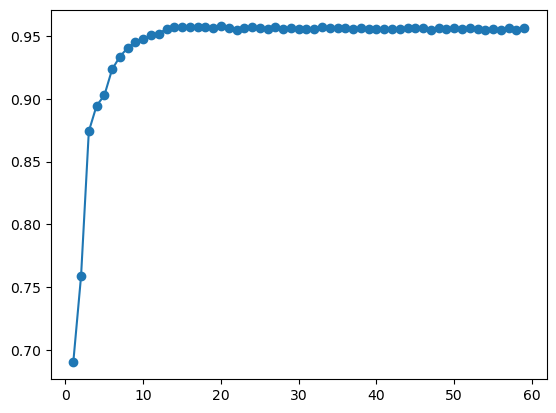

In [73]:
plt.plot(values, test_score, '-o', label='Test');

In [89]:
## Define
dt_model = tree.DecisionTreeClassifier(max_depth=14)

## Training
dt_model.fit(X_train, y_train)

## Classificação
yhat_val = dt_model.predict(X_val)

## Métrica sobre os dados de validação
f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
print('F1-Score over Validation: {}'.format(f1score_val))

F1-Score over Validation: 0.9661291970129762


In [54]:
# Dados de Treino + Validação

## Define
lr_model = LogisticRegression()

## Training
lr_model.fit(X_train, y_train)

## Classificação
yhat_val = lr_model.predict(X_val)

## Métrica sobre os dados de validação
# f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
f1score_val = mt.f1_score(y_val, yhat_val)
print('F1-Score over Validation: {}'.format(f1score_val))



F1-Score over Validation: 0.6286122740733178


In [55]:
# Dados de Treino + Validação

## Define
model_svm = svm.SVC()

## Training
model_svm.fit(X_train, y_train)

## Classificação
yhat_val = model_svm.predict(X_val)

## Métrica sobre os dados de validação
#f1score_val = mt.f1_score(y_val, yhat_val)
#print('F1-Score over Validation: {}'.format(f1score_val))

# Resultado sem macro
#F1-Score over Validation: 0.8504432370603374


In [56]:
f1score_val = mt.f1_score(y_val, yhat_val, average='macro')
print('F1-Score over Validation: {}'.format(f1score_val))

# Resultado com macro
#F1-Score over Validation: 0.8825230935206438

F1-Score over Validation: 0.8825230935206438


In [57]:
# Dados de Treino + Produção

## Define
# model = tr.DecisionTreeClassifier(max_depth=)

## Training
# model.fit(np.concatenate((X_train, X_val), np.concatenate((y_train, y_val)))

## Classificação
# yhat_pred = model.predict(X_prod)

## Métrica sobre os dados de validação
# acc_prod = mt.accuracy_score(y_prod, yhat_pred)
# print('Accuracy over production: {}'.format(acc_prod))



## 7.1 Models and Cross-Validation

## 7.2 Model to Submission

In [58]:
## Label Encoding

test['já_se_hospedou_anterioremente']         = le.fit_transform(test['já_se_hospedou_anterioremente'])
test['reserva_feita_por_agência_de_turismo']  = le.fit_transform(test['reserva_feita_por_agência_de_turismo'])
test['reserva_feita_por_empresa']             = le.fit_transform(test['reserva_feita_por_empresa'])
test['reserva_com_estacionamento']            = le.fit_transform(test['reserva_com_estacionamento'])
test['forma_de_reserva']                      = le.fit_transform(test['forma_de_reserva'])
test['classificação_do_hotel']                = le.fit_transform(test['classificação_do_hotel'])

## Ordinal Encoding (dar peso)

## regime_de_alimentação
regime_alim_dict = {'Sem refeicao'                   : 3,
                    'Café da manha'                  : 2,
                    'Café da manha e jantar'         : 1,
                    'Café da manha, almoco e jantar' : 0}
test['regime_de_alimentação'] = test['regime_de_alimentação'].map(regime_alim_dict)

## tipo_do_quarto_reservado
tp_quarto_dict = {
'Moonstone'     :1,
'Peridot'       :2,
'Topaz'         :3,
'Garnet'        :4,
'Tanzanite'     :5, 
'Amethyst'      :6,
'Green Emerald' :7,
'Pink Sapphire' :8,
'Blue Sapphire' :9,   
'Red Ruby'      :10 
}
test['tipo_do_quarto_reservado'] = test['tipo_do_quarto_reservado'].map(tp_quarto_dict)

## reserva_com_observações
reserv_obs_dict = {'Nenhuma':2, '1 a 3':1, 'Mais de 3':0}
test['reserva_com_observações'] = test['reserva_com_observações'].map(reserv_obs_dict)


## Category Encoders

count = CountEncoder(cols=['nacionalidade'], return_df=True) 
test['nacionalidade'] = count.fit_transform(test['nacionalidade'])



## Limpezas dos NA's
test = test.fillna(0)


## Alteração da variável alvo
test['número_de_hospedes'] = test['número_de_hospedes'].astype(int)
test['regime_de_alimentação'] = test['regime_de_alimentação'].astype(int)
test['tipo_do_quarto_reservado'] = test['tipo_do_quarto_reservado'].astype(int)
test['reserva_com_observações'] = test['reserva_com_observações'].astype(int)

In [59]:
test.dtypes

id                                      int64
classificação_do_hotel                  int32
meses_da_reserva_até_o_check_in         int64
número_de_pernoites_reservadas          int64
número_de_hospedes                      int32
regime_de_alimentação                   int32
nacionalidade                           int64
forma_de_reserva                        int32
já_se_hospedou_anterioremente           int32
tipo_do_quarto_reservado                int32
reserva_feita_por_agência_de_turismo    int32
reserva_feita_por_empresa               int32
reserva_com_estacionamento              int32
reserva_com_observações                 int32
dtype: object

In [60]:
#predicao_lr = model.predict(test)

#df_final_lr = pd.concat([test.id, pd.Series(predicao_lr, name = 'Reserva Cancelada')], axis=1)

#df_final_lr.head()


In [61]:
#predicao_svm = model_svm.predict(test)

#df_final_svm = pd.concat([test.id, pd.Series(predicao_svm, name = 'Reserva Cancelada')], axis=1)

#df_final_svm.head()


,id,Reserva Cancelada
0,118345,0
1,9500,0
2,34558,0
3,70816,1
4,105321,0


In [61]:
predicao_dt = dt_model.predict(test)

df_final_dt = pd.concat([test.id, pd.Series(predicao_dt, name = 'Reserva Cancelada')], axis=1)

df_final_dt.head()


,id,Reserva Cancelada
0,118345,0
1,9500,0
2,34558,0
3,70816,1
4,105321,0


In [62]:
df_final_dt.dtypes

id                   int64
Reserva Cancelada    int32
dtype: object

In [63]:
df_final_dt.to_csv('../data/result/submission.csv', index=False) #Arquivo de submissão pronto para ser enviado.

# 8.0 Hyperparameter Fine Tunning

## 8.1 Model 1 (RandomForest)

In [64]:
## Definição dos parâmetros utilizados pelo algoritmo

# parameters = {
#     'n_estimators': [800,1200,2000],
#     'max_depth': [5,20,40,80,None],
#     'min_samples_split': [2,10,20,40],
#     'min_impurity_decrease': [0,.05,0.1]
# }


## Definição do método

# skf = StratifiedKFold(n_splits = 10)
# rf_search =  BayesSearchCV(estimator = RandomForestClassifier(max_features = 'sqrt'),
#                            search_spaces = parameters,
#                            n_jobs = -1,
#                            cv = skf,
#                            scoring = 'f1_weighted',
#                            random_state = 42)

# rf_search_result = rf_search.fit(x_train, y_train)

## 8.1 Model 2 (XGBoost)

In [65]:
## Definição dos parâmetros utilizados pelo algoritmo

# parameters = {
#     'n_estimators': [500,800,1200,1600,2200,3000],
#     'learning_rate': [0.05,0.1,0.15],
#     'max_depth': [10,20,40,80,None],
#     'min_samples_split': [2,10,20,40,100],
#     'min_impurity_decrease': [0,.05,.1],
#     'colsample_bytree': [0.3,0.5,0.8],
#     'subsample': [0.1,0.4,0.7]
# }


# skf = StratifiedKFold(n_splits=10)
# xgb_search =  BayesSearchCV(estimator = XGBClassifier(),
#                            search_spaces = parameters,
#                            n_jobs = -1,
#                            cv = skf,
#                            scoring = 'f1_weighted',
#                            random_state = 42)

# xgb_search_result = xgb_search.fit(x_train, y_train)